In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('google.csv')

In [3]:
data.head(5)

,date,close,high,low,open,volume
0,2016-06-14,718.27,722.47,713.1200,716.48,1306065
1,2016-06-15,718.92,722.98,717.3100,719.00,1214517
2,2016-06-16,710.36,716.65,703.2600,714.91,1982471
3,2016-06-17,691.72,708.82,688.4515,708.65,3402357
4,2016-06-20,693.71,702.48,693.4100,698.77,2082538


In [336]:
y = data['close'].values.reshape(-1,1)

In [337]:
y

array([[ 718.27],
       [ 718.92],
       [ 710.36],
       ...,
       [2491.4 ],
       [2521.6 ],
       [2513.93]])

In [338]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(y)

In [323]:
scaled_data

array([[0.02698372],
       [0.02733443],
       [0.02271575],
       ...,
       [0.98370509],
       [1.        ],
       [0.99586153]])

In [324]:
train_size = int(len(scaled_data)*0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [325]:
def create_seq(data,seq_length):
    X,y = [],[]
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X),np.array(y)

X_train,y_train = create_seq(train_data,10)
X_test,y_test = create_seq(test_data,10)

In [326]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN

In [327]:
model = Sequential()

In [328]:
model.add(SimpleRNN(units=50,return_sequences=False,input_shape = (X_train.shape[1],X_train.shape[2])))
model.add(Dense(units=1))

In [329]:
moel.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_13 (SimpleRNN)   (None, 50)                2600      
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [330]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [331]:
history = model.fit(X_train,y_train,validation_split=0.2,epochs=10,batch_size=64)

Epoch 1/10
13/13 [==============================] - 1s 13ms/step - loss: 0.0111 - val_loss: 0.0170
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 7.0227e-04 - val_loss: 0.0029
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 4.8266e-04 - val_loss: 0.0021
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 3.8836e-04 - val_loss: 0.0014
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 3.6117e-04 - val_loss: 0.0016
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 3.4203e-04 - val_loss: 0.0016
Epoch 8/10
13/13 [==============================] - 0s 4ms/step - loss: 3.1861e-04 - val_loss: 0.0013
Epoch 9/10
13/13 [==============================] - 0s 4ms/step - loss: 2.9781e-04 - val_loss: 0.0011
Epoch 10/10
13/13 [==============================] - 0s 4ms/step - loss: 2.8218e-04 - val

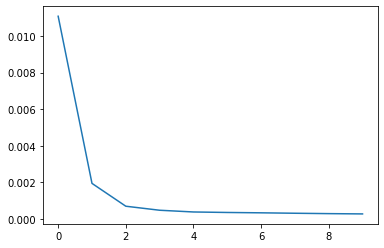

In [332]:
plt.plot(history.history["loss"])